TIF images → `Extract-Channels` → `Visualize-Inputs` → `Predict-Segments` → `Visualize-Segmentation` → predicted segmentations

From source image, extract the nuclear & membrane channels. Save each to npz.

Not sure how we'll configure channel extraction. Maybe should do that individually.

In [1]:
import numpy as np
import os
import smart_open
import tifffile

In [2]:
input_path = 'gs://davids-genomics-data-public/cellular-segmentation/10x-genomics/preview-human-breast-20221103-418mb/Xenium_FFPE_Human_Breast_Cancer_Rep1_if_image.tif'
output_path = 'gs://davids-genomics-data-public/cellular-segmentation/10x-genomics/preview-human-breast-20221103-418mb/input_channels.npz'

In [3]:
with smart_open.open(input_path, 'rb') as input_file:
  tif = tifffile.TiffFile(input_file)

  # An array of shape [rows, cols, intensity] containing intensity of membrane channel
  # Specified here: https://www.10xgenomics.com/products/xenium-in-situ/preview-dataset-human-breast
  # Channel 0: 1:200 CD20, Goat anti-Mouse IgG-488 , (Abcam, Cat. No. ab219329, Thermo Fisher Cat. No. A-11029)
  # Channel 1: 1:100 Vimentin, 594 nm (Biolegend Cat. No. 677804)
  # Channel 2: 1:100 PCNA, 647 nm (Biolegend, Cat. No.307912)

  # Combine the membrane channels
  input_membrane = (tif.pages[0].asarray() + tif.pages[1].asarray())

  # Select the nuclear channel
  input_nuclear = tif.pages[2].asarray()[...]

  tif.close()

In [4]:
# Stack the nuclear & membrane channels together.
input_channels = np.stack([input_nuclear, input_membrane], axis=-1)

In [5]:
# Write the resulting 3d array (rows, cols, 2 intensity channels) to output
with smart_open.open(output_path, 'wb') as output_file:
  np.savez_compressed(output_file, input_channels=input_channels)

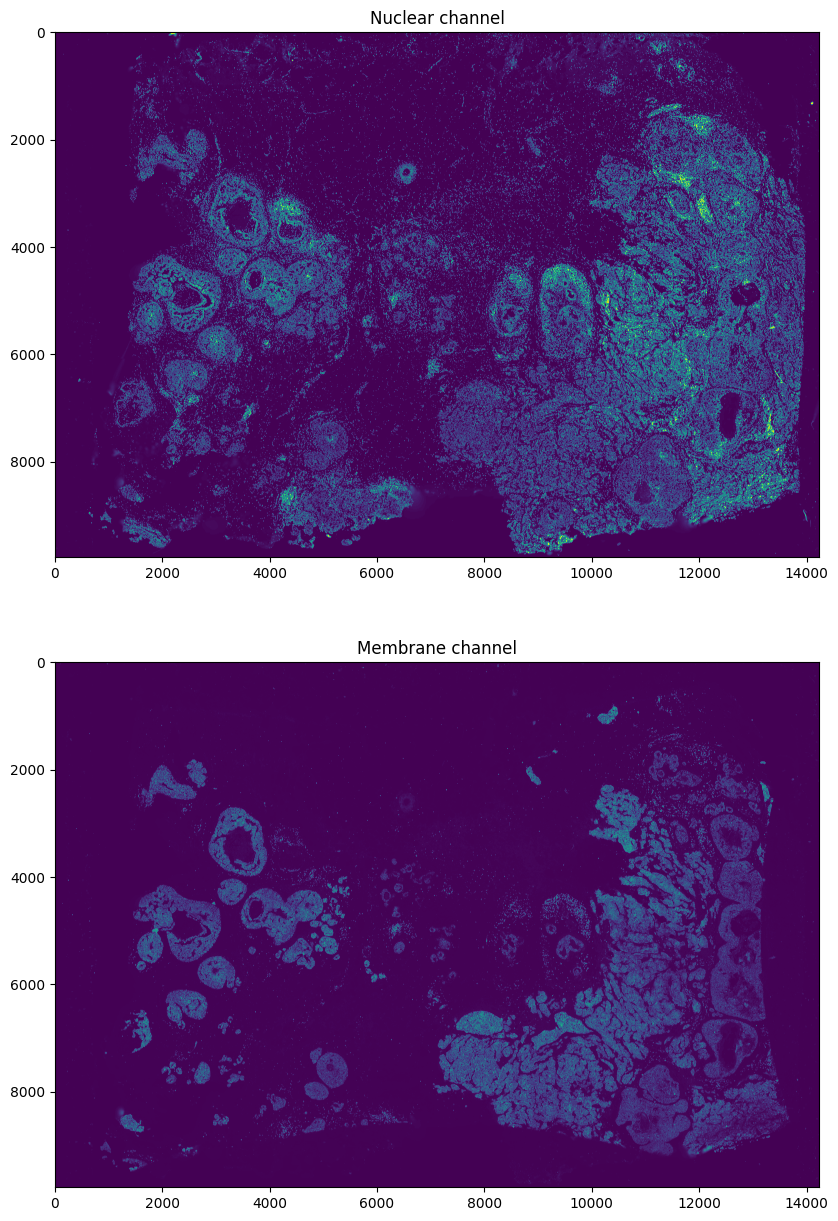

In [6]:
# Visualize nuclear/membrane channels
from matplotlib import pyplot as plt
fig, ax = plt.subplots(2, 1, figsize=(15, 15))
ax[0].imshow(input_channels[..., 0])
ax[1].imshow(input_channels[..., 1])
ax[0].set_title('Nuclear channel')
ax[1].set_title('Membrane channel')
plt.show()